# Covid-19 in Indonesia

Saya mencoba melakukan analisis ringan terkait covid-19 di Indonesia, untuk sumber data saya mengambilnya dari https://data.humdata.org/dataset/indonesia-covid-19-cases-recoveries-and-deaths-per-province. Data yang saya gunakan merupakan data per tanggal 23 Juni 2020

# Importing the required libraries

In [1]:
#import library yang diperlukan
import pandas as pd


# Data Preparation

In [2]:
# memanggil data yang digunakan untuk analisis
covid = pd.read_csv("E:/Proyek/Portofolio/Proyek Covid/Indonesia/Case by Provinces - IDN-COVID19 - Sheet2.csv")

In [3]:
# melihat beberapa data
covid.head()

,Type,Features Type,ID-number,Province_code,Province_name,Confirmed_cases,Recovered_cases,Death_cases,Features Geometry Type,Features Geometry Coordinates
0,FeatureCollection,Feature,1,11,Aceh,86,31,3,Point,"96.90952274800009,4.225081892000048"
1,FeatureCollection,Feature,2,12,Sumatera Utara,1690,425,99,Point,"99.05788784900005,2.184779215000049"
2,FeatureCollection,Feature,3,13,Sumatera Barat,750,618,31,Point,"100.46680503000005,-0.85191434799998"
3,FeatureCollection,Feature,4,14,Riau,228,188,10,Point,"101.81289195400007,0.510525849000032"
4,FeatureCollection,Feature,5,15,Jambi,117,77,10,Point,"103.59932,-1.61775"


In [4]:
# mengecek missing value
covid.isnull().sum()

Type                             0
Features Type                    0
ID-number                        0
Province_code                    0
Province_name                    0
Confirmed_cases                  0
Recovered_cases                  0
Death_cases                      0
Features Geometry Type           0
Features Geometry Coordinates    0
dtype: int64

Dapat dilihat diatas bahwa data yang digunakan merupakan data yang baik/bagus

In [5]:
# mengambil kolom yang akan kita gunakan 
covid = covid[['Province_name','Confirmed_cases','Recovered_cases','Death_cases']]

In [6]:
covid.head()

,Province_name,Confirmed_cases,Recovered_cases,Death_cases
0,Aceh,86,31,3
1,Sumatera Utara,1690,425,99
2,Sumatera Barat,750,618,31
3,Riau,228,188,10
4,Jambi,117,77,10


# Data Analysis

Analisis Data Covid-19 di Indonesia

In [7]:
#membuat variabel baru bernama total_cases yang merupakan jumlah kasus covid-19 terkonfirmasi
total_cases = covid['Confirmed_cases'].sum()
print('Total number of confirmed COVID 2019 cases across Indonesia till date (23rd June, 2020):', total_cases)

Total number of confirmed COVID 2019 cases across Indonesia till date (23rd June, 2020): 59387


In [8]:
#menghitung jumlah kasus sembuh, meninggal, dan aktif
total_recovered = covid['Recovered_cases'].sum()
print("Total people who were recovered as of 23rd June, 2020 are: ", total_recovered)
total_cases = covid['Confirmed_cases'].sum()
print("Total people who were detected COVID19 as of 23rd June, 2020 are: ", total_cases)
total_death = covid['Death_cases'].sum()
print("Total people who died due to COVID19 as of 23rd June, 2020 are: ",total_death)
total_active = total_cases-total_recovered-total_death
print("Total active COVID19 cases as of 23rd June, 2020 are: ",total_active)

Total people who were recovered as of 23rd June, 2020 are:  26831
Total people who were detected COVID19 as of 23rd June, 2020 are:  59387
Total people who died due to COVID19 as of 23rd June, 2020 are:  3001
Total active COVID19 cases as of 23rd June, 2020 are:  29555


In [9]:
#JUmlah kasus aktif adalah Jumlah seluruh Kasus - (Jumlah Kasus Meninggal + Jumlah Kasus Sembuh)
covid['Total Active'] = covid['Confirmed_cases'] - (covid['Death_cases'] + covid['Recovered_cases'])
total_active = covid['Total Active'].sum()
print('Total number of active COVID 2019 cases across Indonesia:', total_active)
Tot_Cases = covid.groupby('Province_name')['Total Active'].sum().sort_values(ascending=False).to_frame()
Tot_Cases.style.background_gradient(cmap='Reds')

Total number of active COVID 2019 cases across Indonesia: 29555


,Total Active
Province_name,
Jawa Timur,7356
DKI Jakarta,4314
Sulawesi Selatan,3270
Jawa Tengah,2632
Kalimantan Selatan,2307
Jawa Barat,1502
Sumatera Utara,1166
Papua,1030
Sumatera Selatan,934


In [10]:
import numpy as np
state_cases = covid.groupby('Province_name')['Confirmed_cases','Death_cases','Recovered_cases'].max().reset_index()

#state_cases = state_cases.astype({'Deaths': 'int'})
state_cases['Active'] = state_cases['Confirmed_cases'] - (state_cases['Death_cases']+state_cases['Recovered_cases'])
state_cases["Death Rate (per 100)"] = np.round(100*state_cases["Death_cases"]/state_cases["Confirmed_cases"],2)
state_cases["Recovered Rate (per 100)"] = np.round(100*state_cases["Recovered_cases"]/state_cases["Confirmed_cases"],2)
state_cases.sort_values('Confirmed_cases', ascending= False).fillna(0).style.background_gradient(cmap='Blues',subset=["Confirmed_cases"])\
                        .background_gradient(cmap='Blues',subset=["Death_cases"])\
                        .background_gradient(cmap='Blues',subset=["Recovered_cases"])\
                        .background_gradient(cmap='Blues',subset=["Active"])\
                        .background_gradient(cmap='Blues',subset=["Death Rate (per 100)"])\
                        .background_gradient(cmap='Blues',subset=["Recovered Rate (per 100)"])

C:\Users\Harry\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,Province_name,Confirmed_cases,Death_cases,Recovered_cases,Active,Death Rate (per 100),Recovered Rate (per 100)
11,Jawa Timur,12695,948,4391,7356,7.470000,34.590000
4,DKI Jakarta,11823,638,6871,4314,5.400000,58.120000
28,Sulawesi Selatan,5379,168,1941,3270,3.120000,36.080000
10,Jawa Tengah,4159,170,1357,2632,4.090000,32.630000
9,Jawa Barat,3344,177,1665,1502,5.290000,49.790000
13,Kalimantan Selatan,3337,190,840,2307,5.690000,25.170000
33,Sumatera Selatan,2120,101,1085,934,4.760000,51.180000
24,Papua,1916,16,870,1030,0.840000,45.410000
34,Sumatera Utara,1690,99,425,1166,5.860000,25.150000
1,Bali,1640,16,875,749,0.980000,53.350000


# Conclusion(Kesimpulan)

# Tabel Pertama
Dari dua Tabel yang didapat kita dapat melihat pada tabel pertama bahwa Jumlah kasus aktif tertinggi terdapat di Provinsi Jawa Timur, diidentifikasikan dengan warna merah gelap dan terendah terdapat pada Provinsi Sulawesi Barat. 

# Tabel Kedua
Pada tabel kedua kita bisa melihat bahwa jumlah kasus covid-19 terbanyak terdapat di Provinsi DKI Jakarta diikuti dengan Provindi Jawa Timur dan Sulawesi Selatan.

Jumlah Kasus aktif tertinggi terdapat pada Provinsi Jawa Timur

Jumlah Kematian tertinggi terdapat pada Provinsi Jawa Timur

Jumlah Kesembuhan tertinggi terdapat pada Provinsi DKI Jakarta

Serta Proporsi Kasus Aktif, Sembuh serta Meninggal di Seluruh Provinsi Indonesia

# Visualization

In [11]:
#Import Library
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
#import file dari website yang sama, dengan nama file Daily-Update IDN-COVID19
covid_daily = pd.read_csv("E:/Proyek/Portofolio/Proyek Covid/Indonesia/Daily-Update IDN-COVID19 - Sheet5.csv")

In [13]:
#Melihat Beberapa Data
covid_daily.head()

,Date,Cumulative_cases,Recovered_cases,Total_death,Patient_under_treatment,New_case_per_day,Recovered-cases_perDay,Death_cases_perDay,Treatment_cases_perDay
0,3/2/2020,2,NaN,NaN,2,2,NaN,NaN,2
1,3/3/2020,2,NaN,NaN,2,2,NaN,NaN,2
2,3/4/2020,2,NaN,NaN,2,2,NaN,NaN,2
3,3/5/2020,2,NaN,NaN,2,2,NaN,NaN,2
4,3/6/2020,4,NaN,NaN,4,2,NaN,NaN,2


In [14]:
#Mengecek missing value
covid_daily.isnull().sum()

Date                       0
Cumulative_cases           0
Recovered_cases            8
Total_death                9
Patient_under_treatment    0
New_case_per_day           0
Recovered-cases_perDay     8
Death_cases_perDay         9
Treatment_cases_perDay     0
dtype: int64

# Data Cleaning

In [15]:
covid_daily = covid_daily.fillna(0)

In [16]:
covid_daily_cc = covid_daily[["Date","Cumulative_cases","Recovered_cases","Total_death", "Patient_under_treatment"]]
covid_daily_cc = covid_daily_cc.set_index('Date')
covid_daily_cc.head()

,Cumulative_cases,Recovered_cases,Total_death,Patient_under_treatment
Date,,,,
3/2/2020,2,0.0,0.0,2
3/3/2020,2,0.0,0.0,2
3/4/2020,2,0.0,0.0,2
3/5/2020,2,0.0,0.0,2
3/6/2020,4,0.0,0.0,4


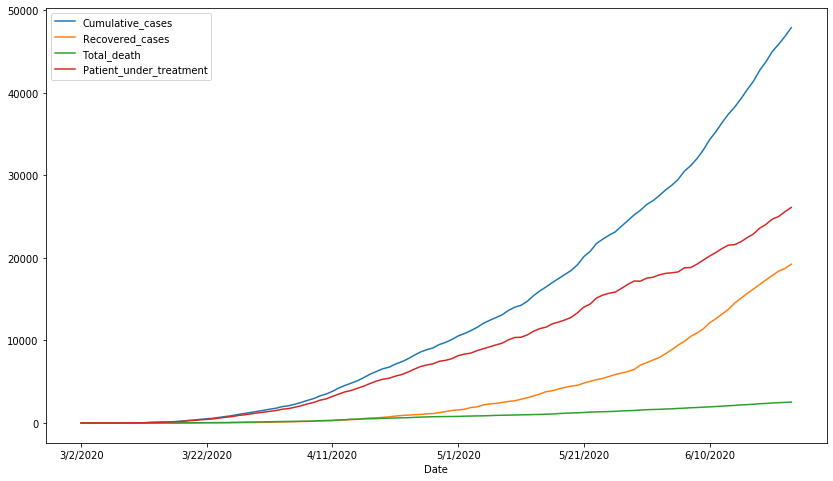

In [17]:
covid_daily_cc.plot(kind='line', figsize=(14,8))

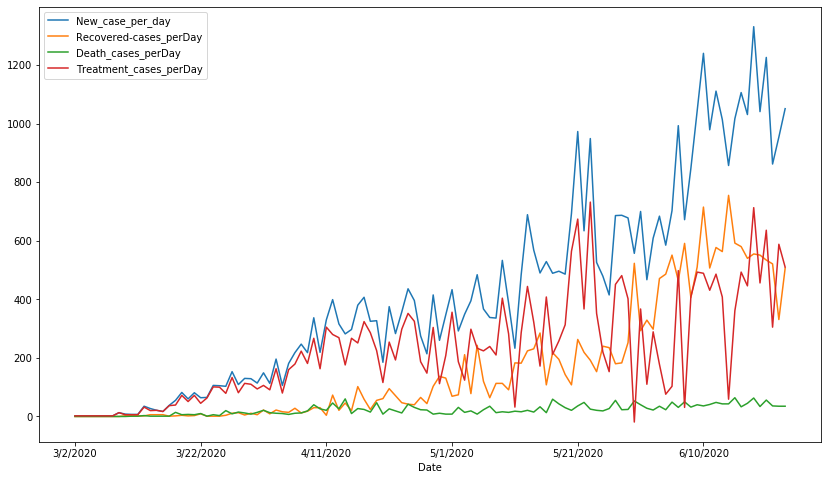

In [18]:
covid_cases_pd = covid_daily[["Date","New_case_per_day","Recovered-cases_perDay","Death_cases_perDay","Treatment_cases_perDay"]]
covid_cases_pd = covid_cases_pd.set_index('Date')
covid_cases_pd.plot(kind='line', figsize=(14,8))